In [90]:
from pybaselines import Baseline, utils
import spectral
import pysptools
from spectral import *
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal, interpolate, statsa
from scipy.interpolate import interp1d
from scipy.signal import find_peaks, find_peaks_cwt
from scipy.optimize import curve_fit

def get_mask_from_waves(wav_array, wav_min, wav_max):
   return (wav_array >= wav_min) * (wav_array <= wav_max)


def compute_EGO_Gaussian(lmbda, si, mu_i, sigma_i, k_i):
    # EGO Gaussian function
    return si * np.exp(-0.5 * ((lmbda - mu_i) ** 2 / (sigma_i - k_i * (lmbda - mu_i)) ** 2))

In [107]:
# Master peak ranges
# This data will need to be committed to a database table so that it can be extracted
# in a more easily edited central location
min_list = np.sort(np.asarray([820, 2490, 645, 790, 880, 1370, 1450, 1465, 1535, 1710, 1890, 1935, 2145, 2185, 2230, 2220, 2270, 2325, 2345, 2375]))
max_list = np.sort(np.asarray([980, 2550, 675, 810, 1150, 1420, 1490, 1500, 1565, 1785, 1940, 1960, 2185, 2230, 2265, 2300, 2330, 2370, 2390, 2415]))
mineral_label = ['iron oxides (goethite, hematite)', 'carbonates', 'molybdenite', 
                 'REE', 'pyroxene', 'micas, clays', 'jarosite', 'alunite', 
                 'epidote', 'sulphates', 'all OH, zeo', 'gypsum',
                 'pyrophyllite', 'Al-OH', 'chlorite, biotite', 'Al-fe smectites', 
                 'Fe-Mg smectites', 'chlorite, biotite', 'tourmaline', 'amphiboles, biotite']
hull_correct_bool = [False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]

In [108]:
n_gt_one = (curr_quotient > 1).sum()

while n_gt_one > 0:
    # plt.plot(curr_quotient)
    curr_index_to_add = curr_quotient.argmax()
    # Append this index to the peaks
    peaks = np.unique(np.sort(np.append(peaks, curr_index_to_add)))
    
    
    prelim_hull = interpolate_linear(curr_pixel[peaks[0]:],
                                     peaks - peaks[0])
    
    concat_hull = np.concatenate((curr_baseline[0:peaks[0]],
                                  prelim_hull))
    plt.figure()
    plt.plot(wav_array, curr_pixel, label='Original Spectrum')
    plt.plot(wav_array, concat_hull, label='Hybrid Baseline')
    plt.plot(wav_array[peaks], curr_pixel[peaks], 'o', label='Peaks')
    plt.legend()
    
    curr_quotient = curr_pixel/concat_hull
    
    plt.figure()
    plt.plot(wav_array,
             curr_quotient,
             label='Hull Quotient')
    plt.legend()
    n_gt_one = (curr_quotient > 1).sum()

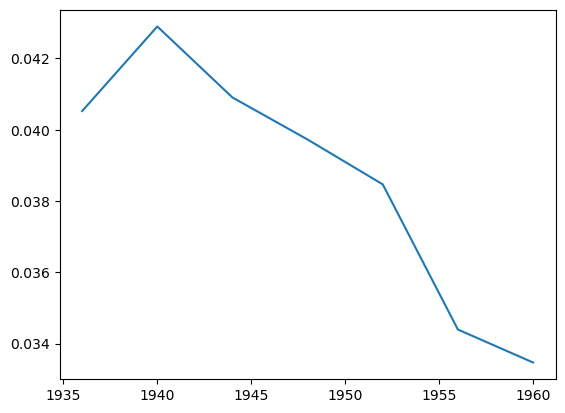

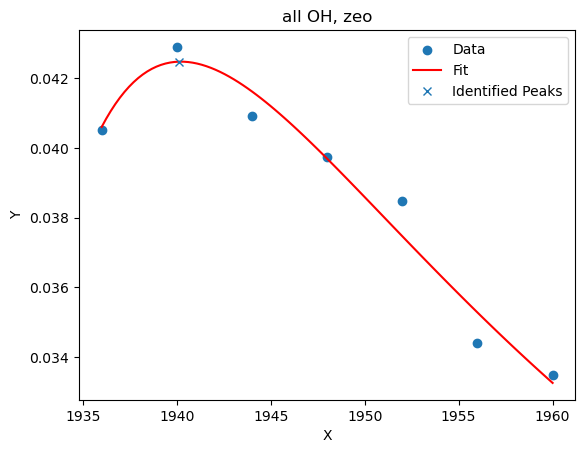

Current center at: 1940.2094637064688
Current peak amplitude: 0.04247377838564895
Current width: 16.52390121717482


In [126]:


# def compute_EGO_Gaussian(params, lmbda):
#     # EGO Gaussian function 
#     si, mu_i, sigma_i, k_i = params
#     return si * np.exp(-0.5 * ((lmbda - mu_i) ** 2 / (sigma_i - k_i * (lmbda - mu_i)) ** 2))

# for i, mineral in enumerate(mineral_label)
i = 10



if hull_correct_bool[i]:
    curr_min = min_list[i]
    curr_max = max_list[i]
    
    curr_mask = get_mask_from_waves(wav_array, curr_min, curr_max)
    curr_wavs = wav_array[curr_mask]
    curr_peak = 1 - curr_quotient[curr_mask]
    
    plt.plot(curr_wavs, curr_peak)

    # Initial guess for the parameters
    initial_guess = [1, # Amplitude
                     np.mean(curr_wavs), # Position
                     np.std(curr_wavs), # Width
                     0.9] # Asymmetry]
    
    # Perform the curve fit
    params, params_covariance = curve_fit(compute_EGO_Gaussian,
                                          curr_wavs,
                                          curr_peak,
                                          p0=initial_guess,
                                          )
    
    # Extract the fitted parameters
    si_fit, mu_i_fit, sigma_i_fit, k_i_fit = params
    
    # Generate the x-values for plotting
    x_values = np.linspace(min(curr_wavs), max(curr_wavs), 100)
    
    # Generate the y-values using the fitted parameters
    y_values = compute_EGO_Gaussian(x_values, si_fit, mu_i_fit, sigma_i_fit, k_i_fit)

    test_peaks = find_peaks(y_values)[0]
    
    
    # Plot the original data and the fitted curve
    plt.figure()
    plt.scatter(curr_wavs, curr_peak, label='Data')
    plt.plot(x_values, y_values, 'r-', label='Fit')
    plt.plot(x_values[test_peaks], y_values[test_peaks], 'x', label='Identified Peaks')
    plt.title(mineral_label[i])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    print(f"Current center at: {mu_i_fit}")
    print(f"Current peak amplitude: {si_fit}")
    print(f"Current width: {sigma_i_fit}")

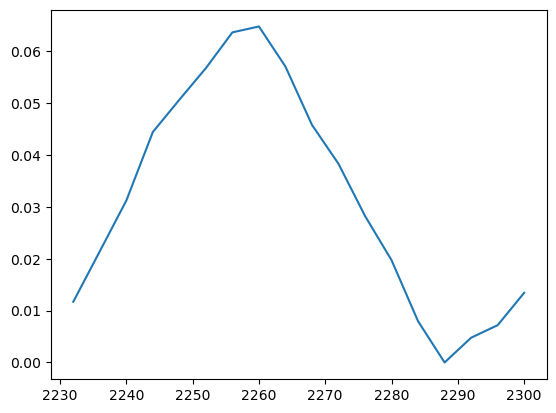

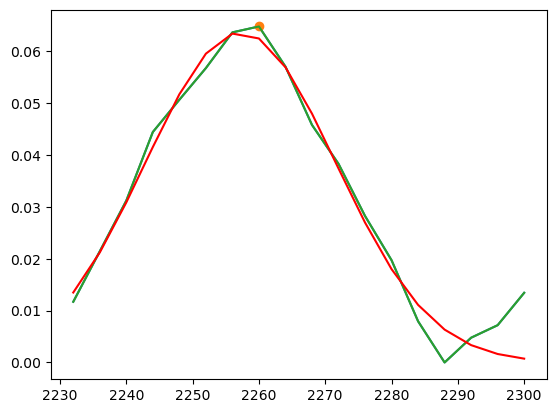

In [131]:


# def compute_EGO_Gaussian(params, lmbda):
#     # EGO Gaussian function 
#     si, mu_i, sigma_i, k_i = params
#     return si * np.exp(-0.5 * ((lmbda - mu_i) ** 2 / (sigma_i - k_i * (lmbda - mu_i)) ** 2))

# for i, mineral in enumerate(mineral_label)
i = 14



if hull_correct_bool[i]:
    curr_min = min_list[i]
    curr_max = max_list[i]
    
    curr_mask = get_mask_from_waves(wav_array, curr_min, curr_max)
    curr_wavs = wav_array[curr_mask]
    curr_peak = 1 - curr_quotient[curr_mask]
    
    plt.plot(curr_wavs, curr_peak)

    # Initial guess for the parameters
    initial_guess = [1, # Amplitude
                     np.mean(curr_wavs), # Position
                     np.std(curr_wavs), # Width
                     0.9] # Asymmetry]
    
    # Perform the curve fit
    params, params_covariance = curve_fit(compute_EGO_Gaussian,
                                          curr_wavs,
                                          curr_peak,
                                          p0=initial_guess,
                                          )
    
    # Extract the fitted parameters
    si_fit, mu_i_fit, sigma_i_fit, k_i_fit = params
    
    # Generate the x-values for plotting
    x_values = np.linspace(min(curr_wavs), max(curr_wavs), 100)
    
    # Generate the y-values using the fitted parameters
    y_values = compute_EGO_Gaussian(x_values, si_fit, mu_i_fit, sigma_i_fit, k_i_fit)

    def func(x, *params):
        y = np.zeros_like(x)
        for i in range(0, len(params), 3):
            ctr = params[i]
            amp = params[i+1]
            wid = params[i+2]
            y = y + amp * np.exp( -((x - ctr)/wid)**2)
        return y
    
    test_peaks = find_peaks(curr_peak, width=5)[0]
    plt.figure()
    plt.plot(curr_wavs, curr_peak)
    plt.plot(curr_wavs[test_peaks], curr_peak[test_peaks], 'o')
    
    guess = []
    for p in test_peaks:
        guess.append(np.round(curr_wavs[p]))
        guess.append(curr_peak[p])
        guess.append(10)
    
    
    # guess = [2100, 1, 10, 
    #          2275, 1, 10]
    # # for i in range(12):
    # #     guess += [60+80*i, 46000, 25]
    
    popt, pcov = curve_fit(func, curr_wavs, curr_peak, p0=guess)
    fit = func(curr_wavs, *popt)
    
    plt.plot(curr_wavs, curr_peak)
    plt.plot(curr_wavs, fit , 'r-')
    plt.show()
    
    
    # # Plot the original data and the fitted curve
    # plt.figure()
    # plt.scatter(curr_wavs, curr_peak, label='Data')
    # plt.plot(x_values, y_values, 'r-', label='Fit')
    # plt.plot(x_values[test_peaks], y_values[test_peaks], 'x', label='Identified Peaks')
    # plt.title(mineral_label[i])
    # plt.xlabel('X')
    # plt.ylabel('Y')
    # plt.legend()
    # plt.show()
    # print(f"Current center at: {mu_i_fit}")
    # print(f"Current peak amplitude: {si_fit}")
    # print(f"Current width: {sigma_i_fit}")



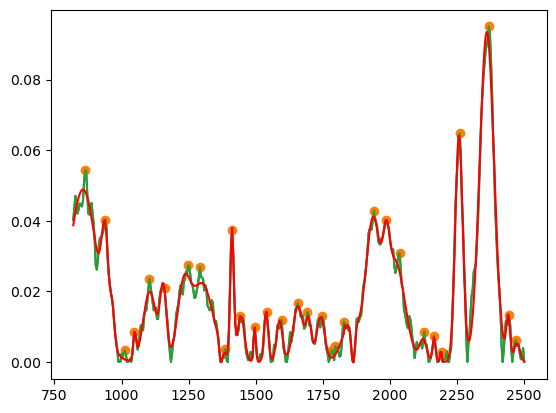

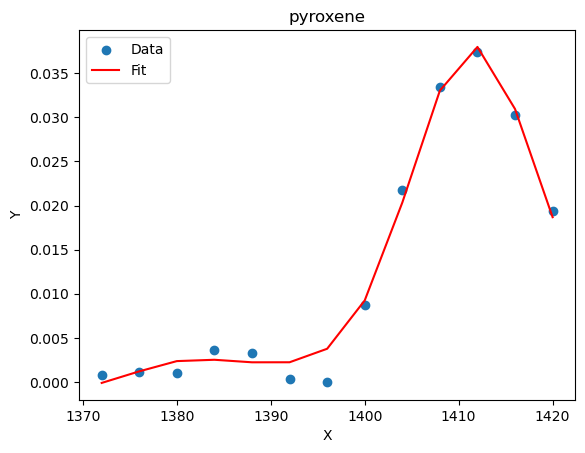

Current center at: 2257.0528682492563
Current peak amplitude: 0.06364226403065718
Current width: 14.308959538240456


In [158]:
# Get the entire spectrum in the range where we care about the peaks

curr_start = min_list[hull_correct_bool].min()
curr_stop  = max_list[hull_correct_bool].max()

curr_mask = get_mask_from_waves(wav_array, curr_start, curr_stop)

curr_wavs = wav_array[curr_mask]
curr_peaks = 1 - curr_quotient[curr_mask]

fit_peaks = find_peaks(curr_peaks, width = 2)[0]

plt.plot(curr_wavs, curr_peaks)
plt.plot(curr_wavs[fit_peaks], curr_peaks[fit_peaks], 'o')

def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

guess = []
for p in fit_peaks:
    guess.append(np.round(curr_wavs[p]))
    guess.append(curr_peaks[p])
    guess.append(10)

popt, pcov = curve_fit(func,
                       curr_wavs,
                       curr_peaks,
                       p0=guess)
fit = func(curr_wavs, *popt)

plt.plot(curr_wavs, curr_peaks)
plt.plot(curr_wavs, fit , 'r-')
plt.show()


i = 4

 
if hull_correct_bool[i]:
    curr_min = min_list[i]
    curr_max = max_list[i]
    
    curr_mask = get_mask_from_waves(curr_wavs, curr_min, curr_max)
    this_wavs = curr_wavs[curr_mask]
    this_peak = curr_peaks[curr_mask]

    # Plot the original data and the fitted curve
    plt.figure()
    plt.scatter(this_wavs, this_peak, label='Data')
    plt.plot(this_wavs, fit[curr_mask], 'r-', label='Fit')
    # plt.plot(x_values[test_peaks], y_values[test_peaks], 'x', label='Identified Peaks')
    plt.title(mineral_label[i])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    print(f"Current center at: {mu_i_fit}")
    print(f"Current peak amplitude: {si_fit}")
    print(f"Current width: {sigma_i_fit}")

90